In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 
import random as rand
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix, vstack, find
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df=pd.read_csv('~/UMDDataChallenge/umd.csv', low_memory=False)
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,8798083,840,USA38335,38335,19-Jan-22,2022,1,Protests,Peaceful protest,Protesters (United States),...,Mobile,30.6944,-88.0431,1,Fox10 (Mobile),Subnational,"On 19 January 2022, demonstrators affiliated w...",0,1643146210,USA
1,8798015,840,USA38345,38345,17-Jan-22,2022,1,Protests,Peaceful protest,Protesters (United States),...,Tuscaloosa,33.2098,-87.5692,1,CBS42; Tuscaloosa News,Subnational,"On 17 January 2022, people marched from Beulah...",0,1643146210,USA
2,8798038,840,USA38312,38312,17-Jan-22,2022,1,Protests,Peaceful protest,Protesters (United States),...,Bessemer,33.4017,-86.9544,1,ABC33/40,Subnational,"On 17 January 2022, community members, pastors...",0,1643146210,USA
3,8798044,840,USA38297,38297,17-Jan-22,2022,1,Protests,Peaceful protest,Protesters (United States),...,Montgomery,32.3763,-86.3095,1,Alabama News Network,Subnational,"On 17 January 2022, local residents gathered o...",0,1643146210,USA
4,8798084,840,USA38381,38381,17-Jan-22,2022,1,Protests,Peaceful protest,Protesters (United States),...,Mobile,30.6944,-88.0431,1,Fox10 (Mobile),Subnational,"On 17 January 2022, community members marched ...",0,1643146210,USA


In [48]:
df.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [49]:
dfyear = df.groupby('year').size()
lyear = list(dfyear)
lyear

[23295, 13904, 573]

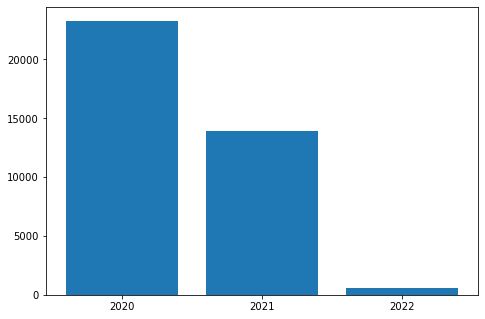

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = ["2020", "2021", "2022"]
ax.bar(years,lyear)
plt.show()

In [51]:
df["event_date"] = pd.to_datetime(df["event_date"]).dt.to_period('M')
dfdate = df.groupby('event_date').size()
ldate = list(dfdate.index)
lcount = list(dfdate.values)

In [53]:
ldate = [str(date) for date in ldate]
print(ldate)
lcount = [int(count) for count in lcount]
print(lcount)

['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01']
[1171.0, 710.0, 420.0, 589.0, 2196.0, 6923.0, 2379.0, 2546.0, 2137.0, 1906.0, 1433.0, 885.0, 1382.0, 879.0, 1600.0, 1715.0, 1532.0, 1134.0, 1038.0, 1095.0, 939.0, 1231.0, 853.0, 506.0, 573.0]


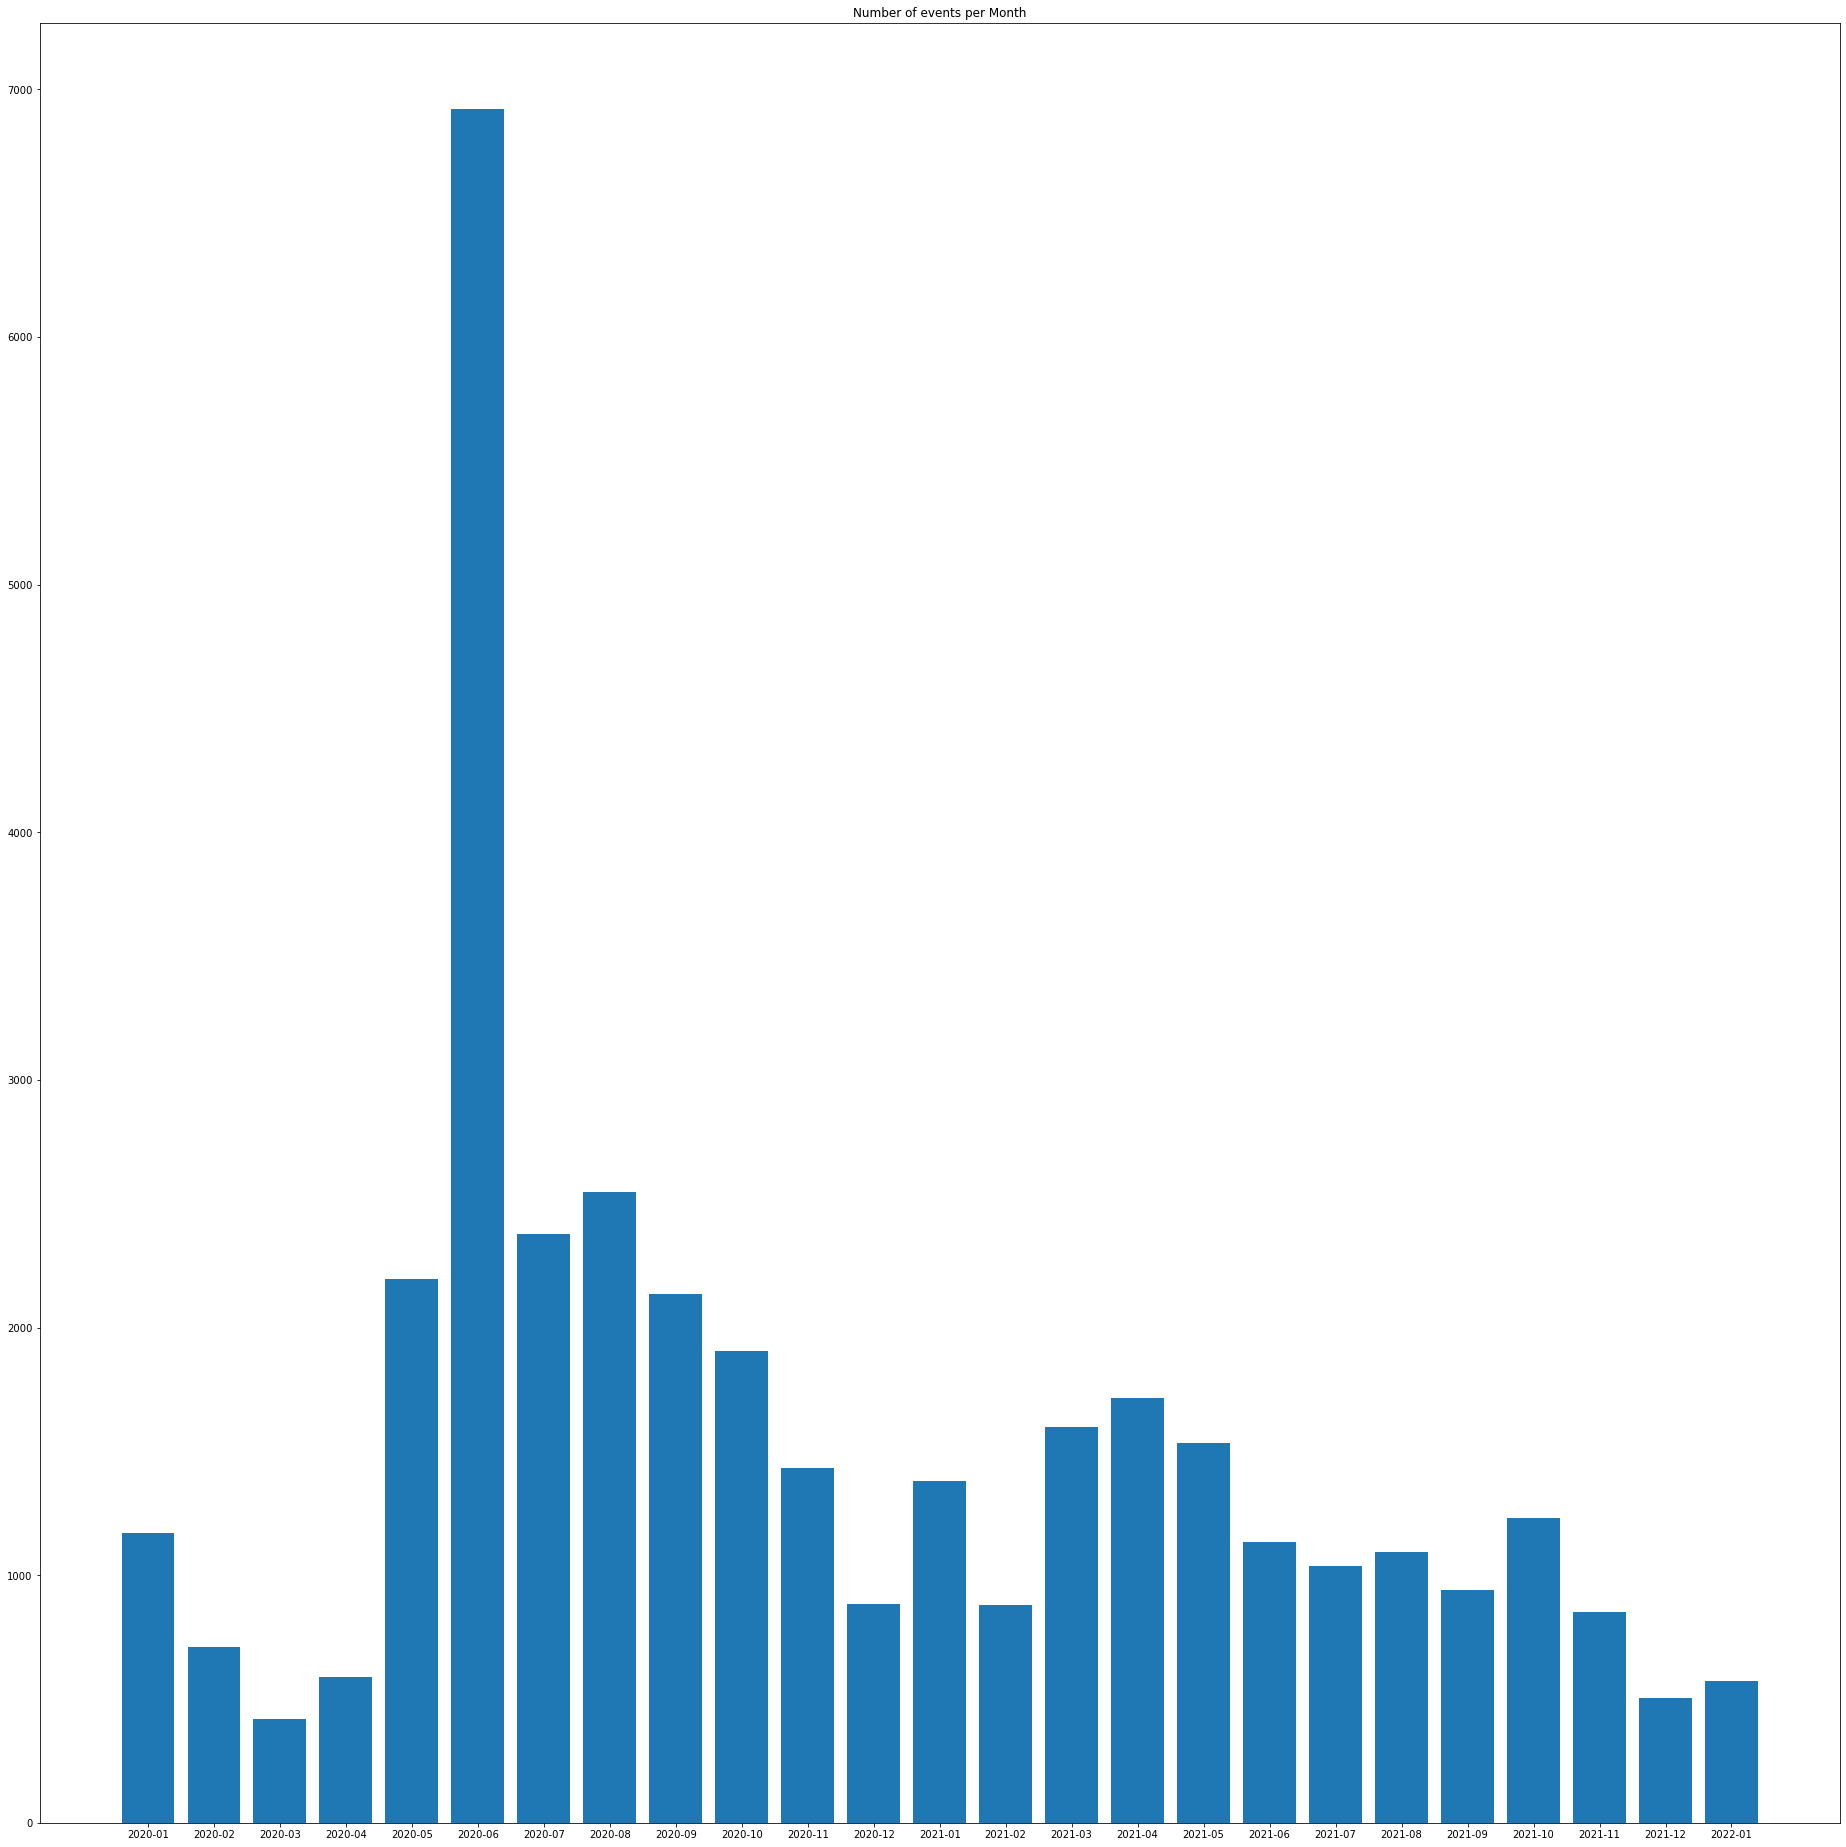

In [59]:
fig = plt.figure(figsize=(len(lcount), len(ldate)))
ax = fig.add_axes([0,0,1,1])
ax.bar(ldate,lcount)
plt.title("Number of events per Month")
plt.show()

In [66]:
dfplace = df.groupby('location').size()
dfplace

location
4S Ranch        1
Abbeville       3
Aberdeen       10
Abilene        17
Abingdon        6
               ..
Zanesville      7
Zephyrhills     1
Zinc            2
Zion            1
Zionsville      2
Length: 4116, dtype: int64

In [67]:
ldate = list(dfplace.index)
lcount = list(dfplace.values)

# Lets look at some actors

In [143]:
dfactors = df[['assoc_actor_1']].dropna()
dfactors

,assoc_actor_1
0,PETA: People for the Ethical Treatment of Animals
1,SCLC: Southern Christian Leadership Conference...
2,Government of the United States (2021-); Prote...
3,DEM: Democratic Party; Government of the Unite...
5,African American Group (United States); DEM: D...
...,...
37767,Tea Party
37768,Women (United States)
37769,Women (United States); LGBT (United States)
37770,Women (United States)


In [163]:
dfdate = df.groupby('event_type').size()
dfdate

event_type
Battles                          15
Explosions/Remote violence        6
Protests                      35044
Riots                          1027
Strategic developments         1498
Violence against civilians      182
dtype: int64

In [164]:
dfbattle = df[df['event_type'] == 'Battles']
dfbattle

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
5036,7596166,840,USA2524,2524,2020-06,2020,1,Battles,Armed clash,KKK: Ku Klux Klan,...,Torrance,33.8339,-118.3420,1,Vice News; New York Times,National,"On 29 June 2020, a man, allegedly linked to Ku...",0,1612546426,USA
5465,8477807,840,USA10429,10429,2020-06,2020,1,Battles,Armed clash,Boogaloo Boys,...,Ben Lomond,37.0891,-122.0864,1,Los Angeles Times; KPRC Channel 2; ProPublica,Subnational-National,"On 6 June 2020, an armed clash ensued between ...",1,1631060750,USA
5921,8362450,840,USA4699,4699,2020-05,2020,1,Battles,Armed clash,Boogaloo Boys,...,Oakland,37.8044,-122.2711,1,NBC News; Los Angeles Times,Subnational-National,"On 29 May 2020, during a demonstration in Oakl...",1,1625004355,USA
6676,8657269,840,USA31566,31566,2021-06,2021,1,Battles,Armed clash,Sole Perpetrator (United States),...,Arvada,39.8028,-105.0875,1,CNN; NBC News; USA Today; Channel 9 (Denver); ...,Subnational-National,"On 21 June 2021, a school resource officer and...",3,1637709102,USA
8225,8610051,840,USA27148,27148,2021-04,2021,1,Battles,Armed clash,Sole Perpetrator (United States),...,Washington DC,38.9171,-77.0003,1,Fox5 (Washington D.C.); Anti-Defamation League...,Subnational-National,"On 2 April 2021, a man rammed his car into two...",2,1635282743,USA
16791,8603097,840,USA35708,35708,2021-10,2021,1,Battles,Armed clash,Sole Perpetrator (United States),...,Brockton,42.0833,-71.0189,1,Republican (Springfield),Subnational,"On 7 October 2021, a man wearing a Nazi armban...",2,1634671560,USA
19072,7923583,840,USA28228,28228,2021-04,2021,1,Battles,Armed clash,Unidentified Armed Group (United States),...,Minneapolis,44.9833,-93.2666,1,CNN,National,"On 18 April 2021, unidentified gunmen in a lig...",0,1619558727,USA
20061,8373788,840,USA19894,19894,2020-12,2020,1,Battles,Armed clash,Sole Perpetrator (United States),...,Saint Louis,38.6270,-90.1913,1,Fox News,National,"On 25 December 2020, a woman hit a sheriff's d...",0,1625605054,USA
20488,8538896,840,USA21644,21644,2020-03,2020,1,Battles,Armed clash,Police Forces of the United States (2017-2021)...,...,Belton,38.8120,-94.5319,1,KCTV5; BBC News; Anti-Defamation League; New Y...,Subnational-National,"On 24 March 2020, an FBI agent shot and killed...",1,1631649215,USA
23930,8261782,840,USA19165,19165,2020-12,2020,1,Battles,Armed clash,Sole Perpetrator (United States),...,New York - Staten Island,40.6058,-74.1350,1,Washington Post,National,"On 6 December 2020, the co-owner of the Mac's ...",0,1624483192,USA


In [172]:
dfDateTypeEvents = df.groupby(['event_date','event_type'])
#dfDateTypeEvents.index.values
#dfNoProtest = dfDateTypeEvents[dfDateTypeEvents['event_type'] != 'Protests']
dfDTEsize = dfDateTypeEvents.size()
dfDTEsize

event_date  event_type                
2020-01     Protests                      1147
            Riots                            1
            Strategic developments          21
            Violence against civilians       2
2020-02     Protests                       667
                                          ... 
2022-01     Battles                          1
            Protests                       548
            Riots                            1
            Strategic developments          18
            Violence against civilians       5
Length: 113, dtype: int64

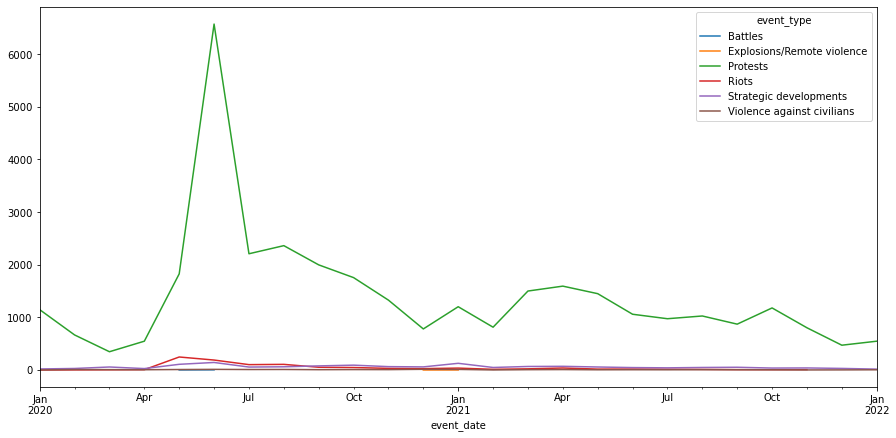

In [173]:
fig, ax = plt.subplots(figsize=(15,7))
dfDTEsize.unstack().plot(ax=ax)
plt.show()

In [174]:
#fig, ax = plt.subplots(figsize=(15,7))
#dfNoProtest.unstack().plot(ax=ax)
#plt.show()

In [175]:
dfDTEsize2 = dfDTEsize.to_frame()
dfDTEsize2.index

MultiIndex([('2020-01',                   'Protests'),
            ('2020-01',                      'Riots'),
            ('2020-01',     'Strategic developments'),
            ('2020-01', 'Violence against civilians'),
            ('2020-02',                   'Protests'),
            ('2020-02',                      'Riots'),
            ('2020-02',     'Strategic developments'),
            ('2020-02', 'Violence against civilians'),
            ('2020-03',                    'Battles'),
            ('2020-03',                   'Protests'),
            ...
            ('2021-11',     'Strategic developments'),
            ('2021-11', 'Violence against civilians'),
            ('2021-12',                   'Protests'),
            ('2021-12',     'Strategic developments'),
            ('2021-12', 'Violence against civilians'),
            ('2022-01',                    'Battles'),
            ('2022-01',                   'Protests'),
            ('2022-01',                      'Rio

In [176]:
dfDTEsize.index.get_level_values(0)

PeriodIndex(['2020-01', '2020-01', '2020-01', '2020-01', '2020-02', '2020-02',
             '2020-02', '2020-02', '2020-03', '2020-03',
             ...
             '2021-11', '2021-11', '2021-12', '2021-12', '2021-12', '2022-01',
             '2022-01', '2022-01', '2022-01', '2022-01'],
            dtype='period[M]', name='event_date', length=113)

In [180]:
dfDTEsize.drop('Protests', level=1, axis=0, inplace=True)
dfDTEsize

event_date  event_type                
2020-01     Riots                          1
            Strategic developments        21
            Violence against civilians     2
2020-02     Riots                          3
            Strategic developments        30
                                          ..
2021-12     Violence against civilians     3
2022-01     Battles                        1
            Riots                          1
            Strategic developments        18
            Violence against civilians     5
Length: 88, dtype: int64

In [181]:
type(dfDTEsize)

pandas.core.series.Series

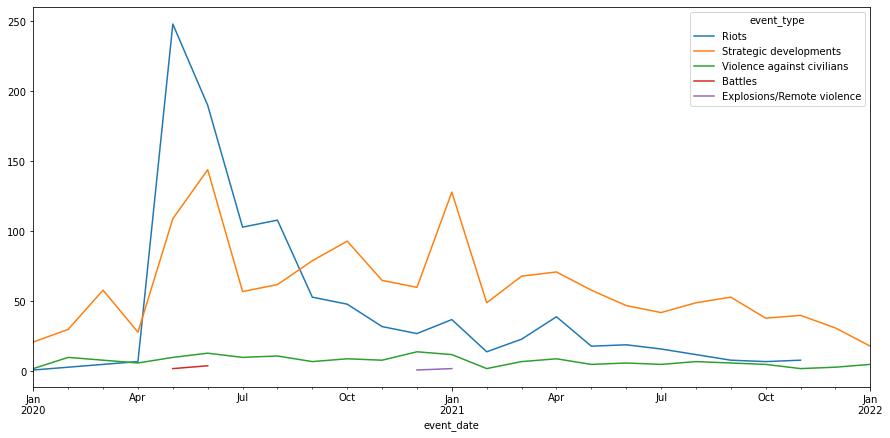

In [182]:
fig, ax = plt.subplots(figsize=(15,7))
dfDTEsize.unstack().plot(ax=ax)
plt.show()